In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import math

In [194]:
# Look across all previously generated figures and tables 
# and write at least three observations or inferences that can be made from the data. 
# Include these observations at the top of notebook.


print(f'1. Capomulin and Ramicane are the most successful in having the lowest final tumor volume.'
     + '\n\n'+
     f'2. The regression plot and the correlation co-efficient show a strong positive correlation between weight and tumor volume. That is, as weight increases so does tumor volume.'
     + '\n\n'+
     f'3. The standard deviation for tumor volume for mice on Ketapril and Naftisol is much higher compared to the other drugs, suggesting that these have particularly unreliable effects.'
     + '\n\n'+
     f'4a. However, Capomulin and Ramicane also have more data points. Checking the sample sizes at timepoint {str(0)}, all drug regimen had same number of mice.'
     + '\n\n'+
     f'4b. This suggests that the other drug regimen led to some event that required the mice be taken out. This event is most likely mortality (I used to work in a rodent lab). This suggests the other drug regimen are not just less efficient - they are leading to fatalities.')




1. Capomulin and Ramicane are the most successful in having the lowest final tumor volume.

2. The regression plot and the correlation co-efficient show a strong positive correlation between weight and tumor volume. That is, as weight increases so does tumor volume.

3. The standard deviation for tumor volume for mice on Ketapril and Naftisol is much higher compared to the other drugs, suggesting that these have particularly unreliable effects.

4a. However, Capomulin and Ramicane also have more data points. Checking the sample sizes at timepoint 0, all drug regimen had same number of mice.

4b. This suggests that the other drug regimen led to some event that required the mice be taken out. This event is most likely mortality (I used to work in a rodent lab). This suggests the other drug regimen are not just less efficient - they are leading to fatalities.


In [14]:
mouse_df = pd.read_csv('Mouse_metadata.csv')
mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [15]:
results_df = pd.read_csv('Study_results.csv')
results_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [16]:
merged_df = pd.merge(mouse_df, results_df, on='Mouse ID', how='left')

#I checked the starting sample size
merged_df.loc[merged_df['Timepoint'] == 0].groupby(['Drug Regimen']).count()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
#I used .agg() to calculate summary statistics

summary_stats = merged_df.groupby('Drug Regimen').agg(
    mean_tumor_volume = pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='mean'),
    median_tumor_volume = pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='median'),
    variance_tumor_volume = pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='var'),
    standard_deviation_tumor_volume = pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.std),
    SEM_tumor_volume = pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=st.sem))


summary_stats


,mean_tumor_volume,median_tumor_volume,variance_tumor_volume,standard_deviation_tumor_volume,SEM_tumor_volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


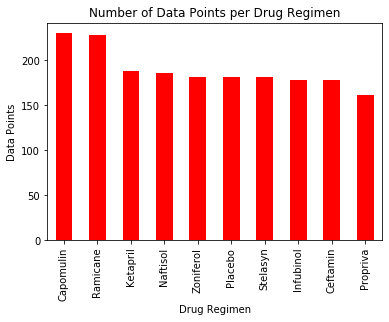

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a bar plot using both Pandas's DataFrame.plot() 
# You must use proper labeling of your plots, to include properties such as: 
# plot titles, axis labels, legend labels, x-axis and y-axis limits, etc.

#I created a grouped df using .groupby() to do this
grouped_df = merged_df['Drug Regimen'].value_counts()

grouped_df

# Configure plot and ticks
grouped_df.plot(kind='bar', color='red')

# Set textual properties
plt.title("Number of Data Points per Drug Regimen")
plt.ylabel("Data Points")
plt.xlabel("Drug Regimen")
# Show plot
plt.show()
plt.tight_layout()


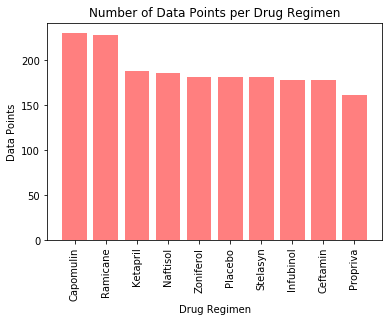

<Figure size 432x288 with 0 Axes>

In [34]:
# and Matplotlib's pyplot that shows the number of data points for each treatment regimen.
# You must use proper labeling of your plots, to include properties such as: 
# plot titles, axis labels, legend labels, x-axis and y-axis limits, etc.

#I used the grouped df created earlier to extract lists for x and y values
grouped_df = pd.DataFrame(grouped_df).reset_index()
count = grouped_df['Drug Regimen'].tolist()
drug_regimen = grouped_df['index'].tolist()


# Configure plot and ticks
x_axis = np.arange(len(drug_regimen))
plt.bar(x_axis, count, align='center', color='red', alpha=0.5) #for some reason this red is lighter...
plt.xticks(x_axis, drug_regimen, rotation='vertical')

# Set textual properties
plt.title("Number of Data Points per Drug Regimen")
plt.ylabel("Data Points")
plt.xlabel("Drug Regimen")

# Show plot
plt.show()
plt.tight_layout()


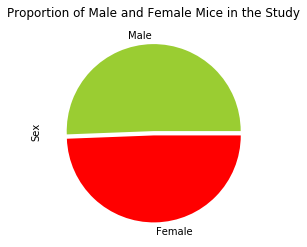

<Figure size 432x288 with 0 Axes>

In [57]:
# Generate a pie plot using both Pandas's DataFrame.plot() 
# You must use proper labeling of your plots, to include properties such as: 
# plot titles, axis labels, legend labels, x-axis and y-axis limits, etc.

#I grouped the dataset by sex

grouped_sex_df = merged_df['Sex'].value_counts()

colors = ["yellowgreen", "red"]
explode = (0, 0.05)

grouped_sex_df.plot(kind='pie', colors=colors, explode=explode)

# Set textual properties
plt.title("Proportion of Male and Female Mice in the Study")

# Show plot
plt.show()
plt.tight_layout()



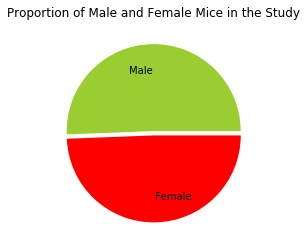

In [195]:
# and Matplotlib's pyplot that shows the distribution of female or male mice in the study.
# You must use proper labeling of your plots, to include properties such as: 
# plot titles, axis labels, legend labels, x-axis and y-axis limits, etc.

#I used the grouped df created earlier to extract lists of values to be plotted in plt.pie
grouped_sex_df = pd.DataFrame(grouped_sex_df).reset_index()
count = grouped_sex_df['Sex'].tolist()
drug_regimen = grouped_sex_df['index'].tolist()

colors = ["yellowgreen", "red"]
explode = (0, 0.05)

plt.pie(count, 
        explode=explode, 
        labels=drug_regimen, 
        colors=colors,
        autopct=None, 
        labeldistance=0.7, 
        radius=None, 
        counterclock=True, 
        rotatelabels=False)
plt.title("Proportion of Male and Female Mice in the Study")
plt.show()

In [142]:
# Calculate the final tumor volume of each mouse 
# across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 

#I first filtered a df of mice on the four drug regimen listed
filtered_df = merged_df.loc[merged_df['Drug Regimen'].isin(['Capomulin','Ramicane', 'Infubinol', 'Ceftamin'])]

#I then selected mouse IDs to use to isolate the last value per ID, as some mice did not provide observations at all timepoints
mouse_id_df = filtered_df['Mouse ID'].value_counts().reset_index()
mouse_id = mouse_id_df['index'].tolist()

#Using a for loop, I collected the indices that contained the last observation for each mouse ID
indices = []

for i in mouse_id:
    index = filtered_df.loc[filtered_df['Mouse ID'] == i].index.max()
    indices.append(index)


indices.sort()

#I used these indices to subset the merged data frame and select the final tumor volume for mice on the listed drug regimens
final_tumor_volume = merged_df.iloc[indices,:]
final_tumor_volume



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [161]:
# Calculate the quartiles for each of the four drug regimens
quartiles_capomulin = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles_ramicane = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles_infubinol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles_ceftamin = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)'].quantile([.25,.5,.75])

# and IQR for each of the four drug regimens
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin

lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane

lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol

lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin

# and quantitatively determine if there are any potential outliers across all four treatment regimens.
lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)

outliers_capomulin = len(final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Capomulin'][final_tumor_volume['Tumor Volume (mm3)'] < lower_bound_capomulin]) + len(final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Capomulin'][final_tumor_volume['Tumor Volume (mm3)'] > upper_bound_capomulin])

lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)

outliers_ramicane = len(final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Ramicane'][final_tumor_volume['Tumor Volume (mm3)'] < lower_bound_ramicane]) + len(final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Ramicane'][final_tumor_volume['Tumor Volume (mm3)'] > upper_bound_ramicane])

lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)

outliers_infubinol = len(final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Infubinol'][final_tumor_volume['Tumor Volume (mm3)'] < lower_bound_infubinol]) + len(final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Infubinol'][final_tumor_volume['Tumor Volume (mm3)'] > upper_bound_infubinol])

lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)

outliers_ceftamin = len(final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Ceftamin'][final_tumor_volume['Tumor Volume (mm3)'] < lower_bound_ceftamin]) + len(final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Ceftamin'][final_tumor_volume['Tumor Volume (mm3)'] > upper_bound_ceftamin])

#I created a dataframe in order to access the outlier information better. I don't understand the error message... but it works anyway!

outliers_dict = {'Drug Regimen': ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin'],
                'Outliers': [outliers_capomulin, outliers_ramicane, outliers_infubinol, outliers_ceftamin]
                }

outliers = pd.DataFrame(outliers_dict)
outliers


/Users/richagautam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/richagautam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/richagautam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/richagautam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Drug Regimen,Outliers
0,Capomulin,0
1,Ramicane,0
2,Infubinol,1
3,Ceftamin,0


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1a9fc890>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1a9df510>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1a9df590>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1aa03c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1b053950>,
 'means': []}

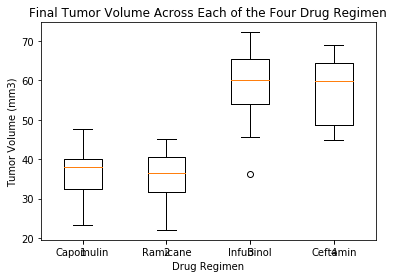

In [184]:
# Using Matplotlib, generate a box and whisker plot of the final tumor volume 
# for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

# Hint: All four box plots should be within the same figure. 
# Use this Matplotlib documentation page for help with changing the style of the outliers.
# You must use proper labeling of your plots, to include properties such as: 
# plot titles, axis labels, legend labels, x-axis and y-axis limits, etc.

#I created lists for each of the boxes in the plot
Capomulin = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'].tolist()
Ramicane = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'].tolist()
Infubinol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)'].tolist()
Ceftamin = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)'].tolist()

#I created a list that contains the lists
drugs_list = [Capomulin, Ramicane, Infubinol, Ceftamin]

#Plot the lists
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Across Each of the Four Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.xticks([1, 2, 3, 4], ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin'])
ax1.boxplot(drugs_list)


Text(0, 0.5, 'Tumor Volume (mm3)')

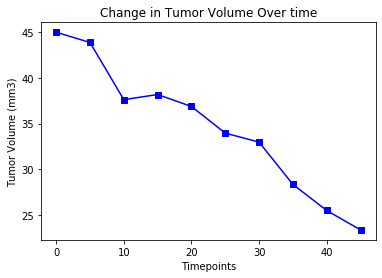

In [174]:
# Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.
# You must use proper labeling of your plots, to include properties such as: 
# plot titles, axis labels, legend labels, x-axis and y-axis limits, etc.

#Choose a mouse!
filtered_df_capomulin = filtered_df.loc[filtered_df['Drug Regimen'] == 'Capomulin'].reset_index()
target_mouse = filtered_df_capomulin['Mouse ID'][0]

#Create a filtered df by chosen mouse
filtered_df_target_mouse = filtered_df_capomulin.loc[filtered_df_capomulin['Mouse ID'] == target_mouse]
filtered_df_target_mouse

#create x and y lists
timepoint = filtered_df_target_mouse['Timepoint'].tolist()
tumor_volume= filtered_df_target_mouse['Tumor Volume (mm3)'].tolist()

#Plot!
plt.plot(timepoint,  tumor_volume, marker ='s', color='blue')
plt.title('Change in Tumor Volume Over time')
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')


Text(0.5, 0, 'Time')

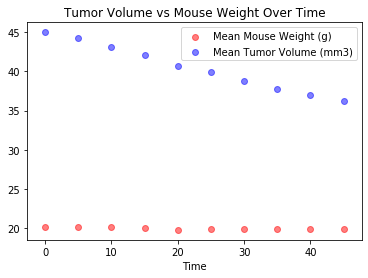

In [183]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
# You must use proper labeling of your plots, to include properties such as: 
# plot titles, axis labels, legend labels, x-axis and y-axis limits, etc.

grouped_df_capomulin = filtered_df_capomulin.groupby('Timepoint').agg(
    mean_mouse_weight = pd.NamedAgg(column='Weight (g)', aggfunc='mean'),
    mean_tumor_volume = pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='mean'))
grouped_df_capomulin = grouped_df_capomulin.reset_index()


mouse_weight = grouped_df_capomulin['mean_mouse_weight'].tolist()
tumor_volume = grouped_df_capomulin['mean_tumor_volume'].tolist()
x_axis = grouped_df_capomulin['Timepoint'].tolist()

plt.scatter(x_axis, mouse_weight, alpha=0.5, color='red', label="Mean Mouse Weight (g)")
plt.scatter(x_axis, tumor_volume, alpha=0.5, color='blue', label="Mean Tumor Volume (mm3)")
plt.legend(loc="upper right")
plt.title('Tumor Volume vs Mouse Weight Over Time')
plt.xlabel('Time')



Text(0, 0.5, 'Tumor Volume (mm3)')

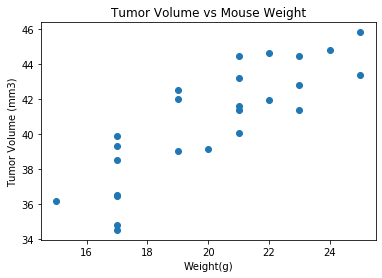

In [204]:
##########################FOR JON/JACK#######################

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
# You must use proper labeling of your plots, to include properties such as: 
# plot titles, axis labels, legend labels, x-axis and y-axis limits, etc.

grouped_df_capomulin = filtered_df_capomulin.groupby('Mouse ID').agg(
    mean_mouse_weight = pd.NamedAgg(column='Weight (g)', aggfunc='mean'),
    mean_tumor_volume = pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='mean'))
grouped_df_capomulin = grouped_df_capomulin.reset_index()

mouse_weight = grouped_df_capomulin['mean_mouse_weight'].tolist()
tumor_volume = grouped_df_capomulin['mean_tumor_volume'].tolist()

# Create plot
plt.scatter(mouse_weight, tumor_volume)
plt.title('Tumor Volume vs Mouse Weight')
plt.xlabel('Weight(g)')
plt.ylabel('Tumor Volume (mm3)')



In [196]:
# Calculate the correlation coefficient 

x_values = grouped_df_capomulin['mean_mouse_weight']
y_values = grouped_df_capomulin['mean_tumor_volume']

print(f'The correlation co-efficient is {round(st.pearsonr(x_values,y_values)[0],2)}')


The correlation co-efficient is 0.82


The r is: 0.8207292487213748


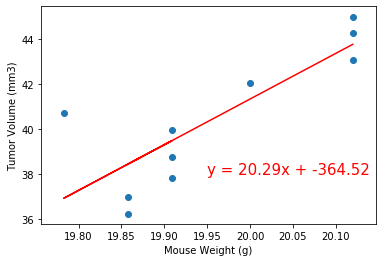

In [205]:
# and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. 
# Plot the linear regression model on top of the previous scatter plot.
# You must use proper labeling of your plots, to include properties such as: 
# plot titles, axis labels, legend labels, x-axis and y-axis limits, etc.

# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(19.95,38),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Print r square value
print(f"The r is: {rvalue}")